<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/Ottimizzazione_dei_modelli_pi%C3%B9_performanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ottimizzazione dei modelli più promettenti

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()

In [ ]:
df = pd.read_csv('HCV_ImputerMean.csv', delimiter=',')
print(df)

## Iniziamo con l'ottimizzazione della logistic regression, partendo dal visualizzare le sue performance di base e poi applicando le docute ottimizzazioni.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# effettuiamo la divisione tra feature di input e feature target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# Create a LogisticRegression model with 'multinomial' solver
logistic_regression = LogisticRegression(multi_class='multinomial',max_iter=1000, solver='lbfgs', random_state=42)

# usiamo la cross-val
scores_LR = cross_val_score(logistic_regression, X, y, cv=10)
mean_accurancy_LR = scores_LR.mean()
print("Accurancy su ogni ciclo della cross-validation:\n", scores_LR)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_LR)

Accurancy su ogni ciclo della cross-validation:
 [0.29496403 0.26618705 0.24460432 0.20863309 0.23021583 0.26811594
 0.25362319 0.2826087  0.28985507 0.26811594]
Accurancy mediata su i 10 fold fatti: 0.2606923157126472


In [10]:
import itertools

def optimize_logistic_regression(X, y, penalties, solvers, max_iters):
    """
    Ottimizza tutti i parametri del modello di classificazione Logistic Regression e traccia un grafico dell'accuratezza in base ai parametri cambiati.

    Parameters:
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.
    penalties (list): Lista di stringhe che specificano le penalità da utilizzare.
    solvers (list): Lista di stringhe che specificano gli algoritmi di ottimizzazione da utilizzare.
    max_iters (list): Lista di interi che specificano il numero massimo di iterazioni da utilizzare.

    Returns:
    None.
    """
    # Genera tutte le possibili combinazioni di parametri
    param_combinations = list(itertools.product(penalties, solvers, max_iters))

    # Inizializza le liste per l'accuratezza e i parametri
    accuracies = []
    params = []

    # Testa ogni combinazione di parametri
    for params_tuple in param_combinations:
        penalty, solver, max_iter = params_tuple
        logistic_regression = LogisticRegression(multi_class='multinomial', penalty=penalty, solver=solver, max_iter=max_iter, random_state=42)
        accuracy = np.mean(cross_val_score(logistic_regression, X, y, cv=10))
        accuracies.append(accuracy)
        params.append(params_tuple)

    # Traccia un grafico dell'accuratezza in base ai parametri cambiati
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(accuracies)), accuracies)
    plt.xticks(range(len(accuracies)), params, rotation=90)
    plt.xlabel('Parametri')
    plt.ylabel('Accuratezza')
    plt.title('Accuratezza in base ai parametri del modello di classificazione Logistic Regression')
    plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearch

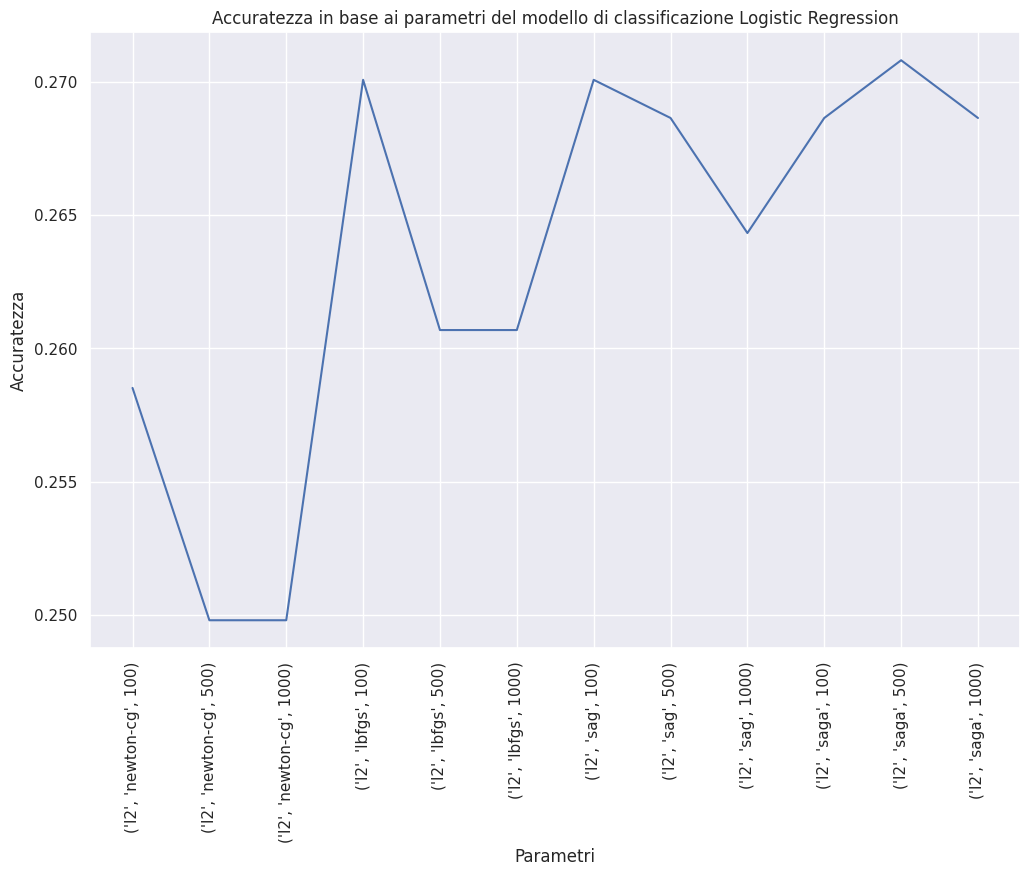

In [12]:
# liste di parametri per ottimizzazione
penalties = ['l2']
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
max_iters = [100, 500, 1000]

# avvio della procedura di ottimizzazione
optimize_logistic_regression(X, y, penalties, solvers, max_iters)

dal test eseguito anche con questa ottimizzazione siamo riusciti a battere la moda, ma il modello permane comunque inefficace per il nostro obbietivo.

Effettuiamo una prova con l'ottimizzazione andando a valutare la cross-val sui principali fold ovvero a 5, 10, 15 e 20

In [8]:
# funzione di supporto creata per riuscire a lavorare con la logistic regression
# Define the evaluate_classifiers function
def eval_clf(cv_values, classifier, X, y):
    """
    Valuta il classificatore con i parametri specificati utilizzando la cross-validation.

    Parameters:
    cv_values (list): Lista di interi che specificano il numero di fold per la cross-validation.
    classifier: Classificatore istanziato con una lista di parametri.
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.

    Returns:
    None.
    """
    print("Classifier:", classifier)
    for cv in cv_values:
        scores = cross_val_score(classifier, X, y, cv=cv)
        mean_accuracy = scores.mean()
        print(f"Cross-validation: {cv}, Mean Accuracy: {mean_accuracy}")

In [13]:
# Istanzia un classificatore Logistic Regression con una lista di parametri
params = {'multi_class':'multinomial', 'penalty': 'l2', 'solver': 'saga', 'max_iter': 500}
logistic_regression = LogisticRegression(**params)

# Valuta il classificatore utilizzando la cross-validation
cv_values = [5, 10, 15, 20]
eval_clf(cv_values, logistic_regression, X, y)

Classifier: LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-validation: 5, Mean Accuracy: 0.25776173285198556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-validation: 10, Mean Accuracy: 0.2708268168074236


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-validation: 15, Mean Accuracy: 0.2591865357643759


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-validation: 20, Mean Accuracy: 0.26420289855072465


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Risultato ottenuto
a 10 l'accurancy è superiore a 27% e a 20 l'accurancy è26.4% battiamo la moda, ma rimaniamo  bassi in performance, mentre a 5 e 15 siamo sotto la moda.

## Secondo tentativo di ottimizzazione proviamo un modello del framework Bayesiano

In [15]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB
import itertools

# istanziazione del modello Bernoulli Naive Bayes
model_Ber = BernoulliNB()

# usiamo la cross-val
scores_Ber = cross_val_score(model_Ber, X, y, cv=10)
mean_accurancy_Ber = scores_Ber.mean()
print("Accurancy su ogni ciclo della cross-validation: \n", scores_Ber)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_Ber)

Accurancy su ogni ciclo della cross-validation: 
 [0.25899281 0.25899281 0.26618705 0.26618705 0.25899281 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957]
Accurancy mediata su i 10 fold fatti: 0.2613700344072568


In [16]:
def optimize_bernoulli_nb(X, y, alphas, fits_prior, binarizes):
    """
    Ottimizza tutti i parametri del classificatore bayesiano BernoulliNB e traccia un grafico dell'accuratezza in base ai parametri cambiati.

    Parameters:
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.
    alphas (list): Lista di float che specificano i valori di smoothing da utilizzare.
    fits_prior (list): Lista di booleani che specificano se stimare le probabilità a priori dai dati o meno.
    binarizes (list): Lista di float o None che specificano la soglia per la binarizzazione delle feature.

    Returns:
    None.
    """
    # Genera tutte le possibili combinazioni di parametri
    param_combinations = list(itertools.product(alphas, fits_prior, binarizes))

    # Inizializza le liste per l'accuratezza e i parametri
    accuracies = []
    params = []

    # Testa ogni combinazione di parametri
    for params_tuple in param_combinations:
        alpha, fit_prior, binarize = params_tuple
        bernoulli_nb = BernoulliNB(alpha=alpha, fit_prior=fit_prior, binarize=binarize)
        accuracy = np.mean(cross_val_score(bernoulli_nb, X, y, cv=10))
        accuracies.append(accuracy)
        params.append(params_tuple)

    # Traccia un grafico dell'accuratezza in base ai parametri cambiati
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(accuracies)), accuracies)
    plt.xticks(range(len(accuracies)), params, rotation=90)
    plt.xlabel('Parametri')
    plt.ylabel('Accuratezza')
    plt.title('Accuratezza in base ai parametri del classificatore bayesiano BernoulliNB')
    plt.show()

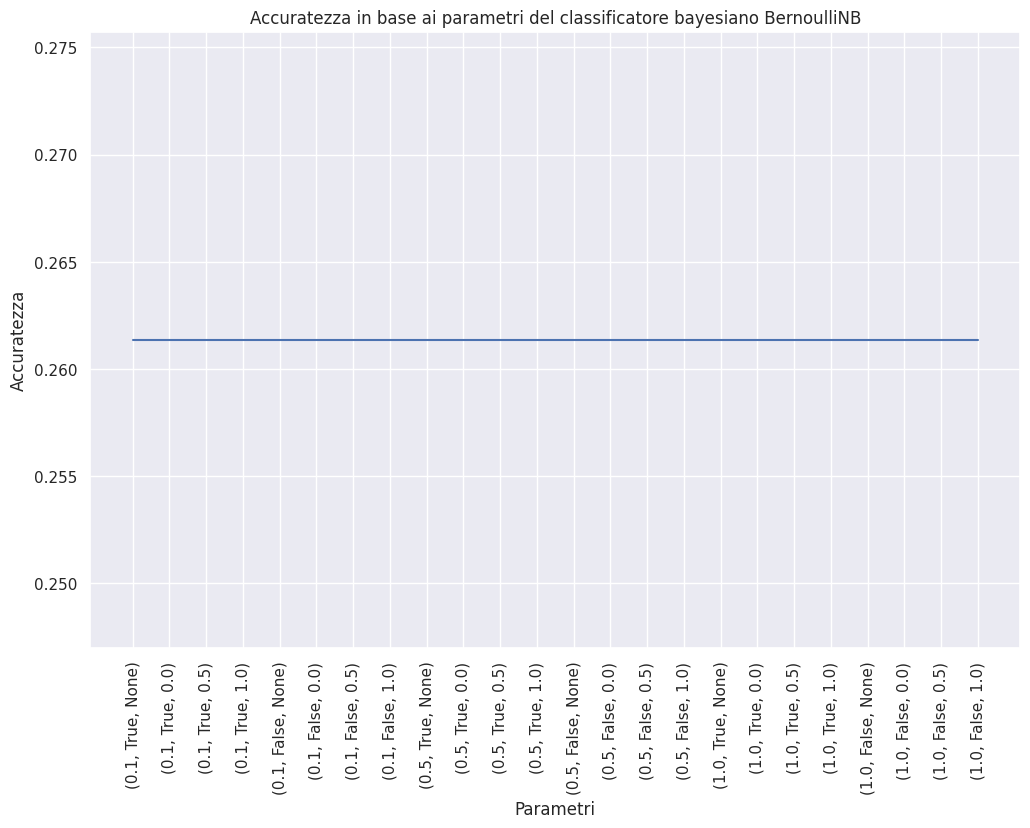

In [17]:
from sklearn.preprocessing import Binarizer

# Binarizzazione  delle feature per il Bernoulli Classifier
binarizer = Binarizer()
X_binarized = binarizer.fit_transform(X)

# liste di parametri per l'ottimizzazione
alphas = [0.1, 0.5, 1.0]
fits_prior = [True, False]
binarizes = [None, 0.0, 0.5, 1.0]

# avvio della procedura di ottimizzaione
optimize_bernoulli_nb(X_binarized, y, alphas, fits_prior, binarizes)

Risultati dell'ottimizzazione del classificatore di Bernoulli portano all'appittimento dell'ootimizzazione a essere uguale alle performance della moda, per tale ragione l'ottimizzazione di tale modello si dichiara una sconfitta.

### Proviamo l'ottimizzazione del ComplementNB

In [18]:
# istanziazione del modello Compleement Naive Byes
model_CNB = ComplementNB()

# usiamo la cross-val
scores_CNB = cross_val_score(model_CNB, X, y, cv=10)
mean_accurancy_CNB = scores_CNB.mean()
print("Accurancy su ogni ciclo della cross-validation: \n", scores_CNB)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_CNB)

Accurancy su ogni ciclo della cross-validation: 
 [0.33093525 0.27338129 0.30935252 0.28057554 0.26618705 0.26086957
 0.23188406 0.25362319 0.27536232 0.24637681]
Accurancy mediata su i 10 fold fatti: 0.27285475967052447


In [19]:
def optimize_complement_nb(X, y, alphas, fits_prior, norms):
    """
    Ottimizza tutti i parametri del classificatore ComplementNB e traccia un grafico dell'accuratezza in base ai parametri cambiati.

    Parameters:
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.
    alphas (list): Lista di float che specificano i valori di smoothing da utilizzare.
    fits_prior (list): Lista di booleani che specificano se stimare le probabilità a priori dai dati o meno.
    norms (list): Lista di booleani che specificano se normalizzare le feature o meno.

    Returns:
    None.
    """
    # Genera tutte le possibili combinazioni di parametri
    param_combinations = list(itertools.product(alphas, fits_prior, norms))

    # Inizializza le liste per l'accuratezza e i parametri
    accuracies = []
    params = []

    # Testa ogni combinazione di parametri
    for params_tuple in param_combinations:
        alpha, fit_prior, norm = params_tuple
        complement_nb = ComplementNB(alpha=alpha, fit_prior=fit_prior, norm=norm)
        accuracy = np.mean(cross_val_score(complement_nb, X, y, cv=10))
        accuracies.append(accuracy)
        params.append(params_tuple)

    # Traccia un grafico dell'accuratezza in base ai parametri cambiati
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(accuracies)), accuracies)
    plt.xticks(range(len(accuracies)), params, rotation=90)
    plt.xlabel('Parametri')
    plt.ylabel('Accuratezza')
    plt.title('Accuratezza in base ai parametri del classificatore ComplementNB')
    plt.show()

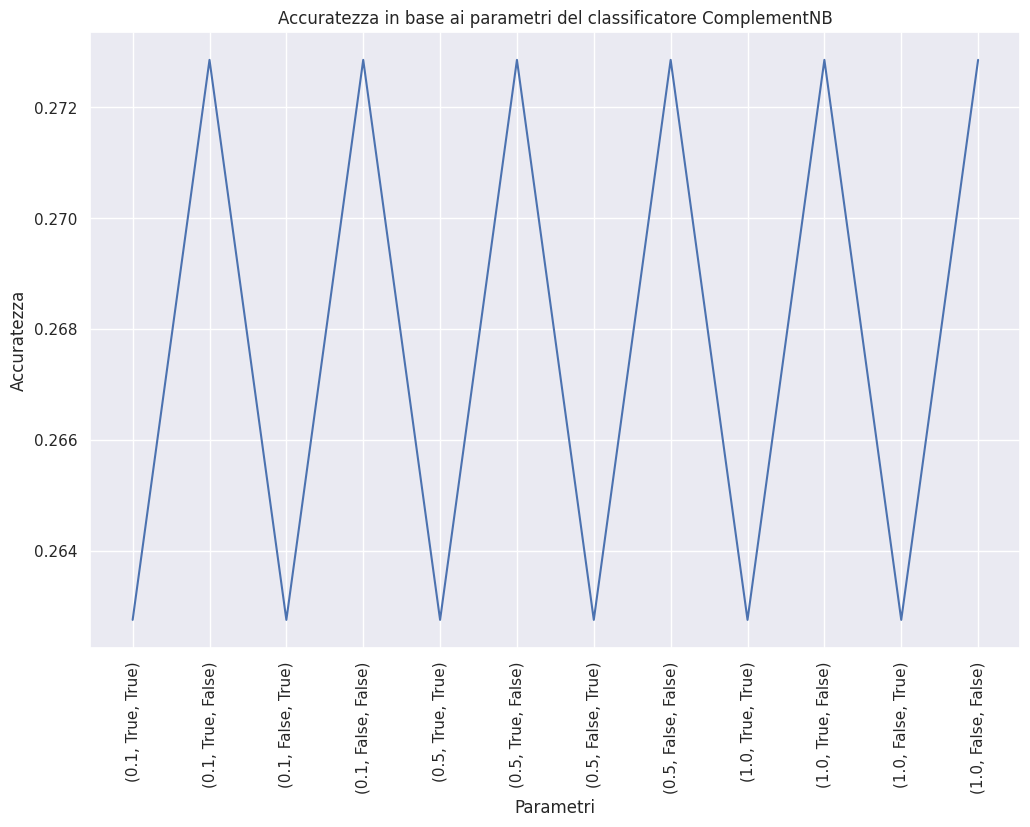

In [20]:
# creazione delle liste per i parametri da ottimizzare utilizzeremo le precedenti liste utilizzate
# per il classificatore BernoulliNB
norms = [True, False]

# avvio della procedura di ottimizzazione del ComplementNB
optimize_complement_nb(X, y, alphas, fits_prior, norms)

Situazione non delle migliori il grafico di tale ottimizzazione poiché le combinazioni di parametri sembrano essere disposte in modo alterno tra quelle che raggiungono il max oltre il 27% di accurancy e quelle che toccano il minimo che risulta supoeriore a 26.2% maggiore della percentuale della moda prendiamo una delle combinazioni a caso che danno vita al massimo per effettuare a un ottimizzazione sulla cross-val.

In [21]:
def evaluate_classifiers(cv_values, params, X, y):
    """
    Esegue la cross-validation per il classificatore ComplementNB con parametri specificati.

    Parameters:
    cv_values (list): Lista di interi che specificano il numero di fold per la cross-validation.
    params (list): Lista di dizionari che specificano i parametri da testare per il classificatore ComplementNB.
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.

    Returns:
    None.
    """
    for param_dict in params:
        print("Parameters:", param_dict)
        for cv in cv_values:
            model = ComplementNB(**param_dict)
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________________________")
            print("##########################################################################################")

In [23]:
# parametri da testare per il classificatore ComplementNB
params = [
    {'alpha': 0.1, 'fit_prior': True, 'norm': False},
    {'alpha': 0.5, 'fit_prior': False, 'norm': False},
    {'alpha': 1.0, 'fit_prior': True, 'norm': False}
]

# cross-validation su classificatore ComplementNB con i parametri specificati
evaluate_classifiers(cv_values, params, X, y)

Parameters: {'alpha': 0.1, 'fit_prior': True, 'norm': False}
CV: 5
Mean Accuracy: 0.26137184115523465
Scores: [0.28519856 0.28158845 0.23465704 0.23104693 0.27436823]
__________________________________________________________________________________________
##########################################################################################
CV: 10
Mean Accuracy: 0.27285475967052447
Scores: [0.33093525 0.27338129 0.30935252 0.28057554 0.26618705 0.26086957
 0.23188406 0.25362319 0.27536232 0.24637681]
__________________________________________________________________________________________
##########################################################################################
CV: 15
Mean Accuracy: 0.2648511765622565
Scores: [0.38709677 0.22580645 0.32258065 0.2688172  0.30107527 0.26086957
 0.29347826 0.18478261 0.25       0.25       0.23913043 0.17391304
 0.27173913 0.23913043 0.30434783]
________________________________________________________________________________________

Con le tuple di parametri ottimizzati eseguendo la cross-val sui principali fold 5, 10 , 15 e 20 il classificaotre ComplementNB riesce a battere sempre la moda, ma anche esso risulta insufficiente per l'utilizzo che ci siamo prefissati.

Creiamo una funzione che ci permetta di ottimizzare la cross-val di modo incrementale e che ci dia un  grafico dell'andamento dei fold in relazione all'accurancy.

In [27]:
def evaluate_ComplementNB_with_plot(cv_values, params, X, y, step):
    """
    Esegue la cross-validation per il classificatore ComplementNB con una sola tupla di parametri e traccia un grafico dell'accuratezza media in base al numero di fold.

    Parameters:
    cv_values (list): Lista di interi che specificano il numero di fold per la cross-validation.
    params (tuple): Tupla di parametri per il classificatore ComplementNB.
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.
    step (int): Passo per gli intervalli sull'asse x del grafico.

    Returns:
    None.
    """
    print("Classifier: ComplementNB")
    mean_accuracies_list = []
    for cv in cv_values:
        model = ComplementNB(alpha=params[0], fit_prior=params[1])
        scores = cross_val_score(model, X, y, cv=cv)
        mean_accuracy = scores.mean()
        mean_accuracies_list.append(mean_accuracy)
        print("CV:", cv)
        print("Mean Accuracy:", mean_accuracy)
        print("Scores:", scores)
        print("----------")

    # Plotting the mean accuracies
    cv_range = np.array(cv_values)
    plt.plot(cv_range, mean_accuracies_list)
    plt.xticks(np.arange(0, max(cv_range) + 1, step))
    plt.xlabel('Number of folds (cv)')
    plt.ylabel('Mean Accuracy')
    plt.title('Cross-Validation Mean Accuracy')
    plt.show()

Classifier: ComplementNB
CV: 2
Mean Accuracy: 0.2606431782732361
Scores: [0.26984127 0.25144509]
----------
CV: 3
Mean Accuracy: 0.26715559687360124
Scores: [0.25541126 0.26839827 0.27765727]
----------
CV: 4
Mean Accuracy: 0.2736606919758125
Scores: [0.25360231 0.30346821 0.24566474 0.29190751]
----------
CV: 5
Mean Accuracy: 0.26137184115523465
Scores: [0.28519856 0.28158845 0.23465704 0.23104693 0.27436823]
----------
CV: 6
Mean Accuracy: 0.2678681222159483
Scores: [0.29004329 0.28138528 0.26406926 0.25541126 0.25108225 0.26521739]
----------
CV: 7
Mean Accuracy: 0.2541513759787871
Scores: [0.25757576 0.25252525 0.32323232 0.19191919 0.24242424 0.25757576
 0.25380711]
----------
CV: 8
Mean Accuracy: 0.2555893296126503
Scores: [0.26436782 0.26589595 0.26011561 0.23699422 0.25433526 0.22543353
 0.26589595 0.2716763 ]
----------
CV: 9
Mean Accuracy: 0.2722038310273604
Scores: [0.2987013  0.30519481 0.29220779 0.31168831 0.18181818 0.26623377
 0.23376623 0.28571429 0.2745098 ]
---------

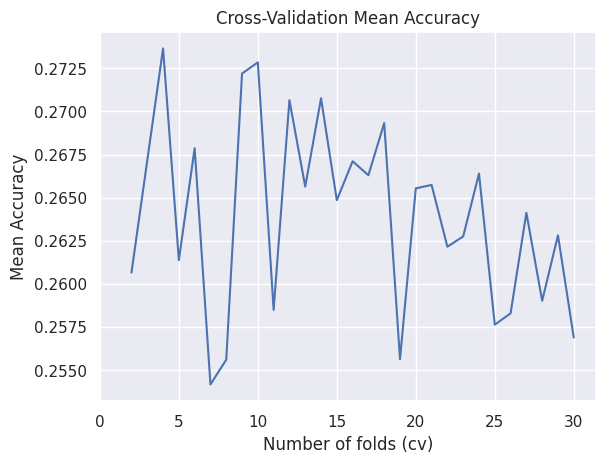

In [28]:
# Esegui la cross-validation per il classificatore ComplementNB con la tupla di parametri specificata e traccia il grafico dell'accuratezza media
evaluate_ComplementNB_with_plot(range(2,31), (0.5, False), X, y, 5)

L'ottimizzazione della cross-val ci dice quello che avevamo già constato con i principali fold, il migliore dal grafico risulta k=4, non continuiamo a testare altri valori maggiori di 30 dato che lòa funzione sembra descresce.